In [11]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [12]:
# Read results from previous simulation


def readPreviousResults(previous_simulation_file):
    """Reads previous simulation results saved in the results variable for a given time-step"""

    with open(previous_simulation_file, "rb") as handle:
        previous_results = pickle.load(handle)

    return previous_results


def getResults(results, variable_name):
    """Get a vriable results from a given time-step"""
    for i in range(len(results)):
        if results[i][0] == variable_name:
            variable = results[i][1]
            return variable


def readResultsVariable(file_address, variable_name):
    with open(file_address + variable_name + ".pickle", "rb") as handle:
        variable = pickle.load(handle)
    return variable


def plotResults(results, label_x, label_y):
    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    plt.xlabel(label_x)
    plt.ylabel(label_y)

    nb_simulations = len(results)

    for i in range(nb_simulations):
        name_simulation = results[i][0]
        x_values = results[i][1]
        y_values = results[i][2]
        plt.plot(x_values, y_values, label=name_simulation)
    plt.legend()

    plt.show()
    


def plotCompareSimulations(results, title, label_x, label_y, save_filename):
    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    # plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

    nb_simulations = len(results)

    for i in range(nb_simulations):
        name_simulation = results[i][0]
        x_values = results[i][1]
        y_values = results[i][2]
        plt.plot(x_values, y_values, label=name_simulation)
    plt.legend()
    # plt.savefig(save_filename)
    plt.show()

In [13]:
filepath = "output/"
file_address = filepath + "lipfield_"
time_data = readResultsVariable(file_address, "time_data")

time_simulation = time_data[0]
dt = time_data[1]
n_steps = int(time_simulation/ dt)

# n_steps = time_data[2]
size = int(n_steps / 10 +1)
n_fragments = np.zeros(size)
avg_stress_bar = np.zeros(size)
energies = []
sfrag = []
i = 0
for n in range(n_steps):
    if n%10 ==0:
        results = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        n_fragments[i] = getResults(results, "n_fragments")
        avg_stress_bar[i] = getResults(results, "avg_stress_bar")
        energies.append(getResults(results, "energies"))
        sfrag.append(getResults(results, "frag_lengths"))
        i += 1

time = np.linspace(0, time_simulation, size)
stress_bar =[["LIP 1250 elements", time, avg_stress_bar/10**6]]
n_frag = [["LIP 1250 elements", time, n_fragments]]

In [15]:
filepath = "output/"
file_address = filepath + "akantu_"
time_data = readResultsVariable(file_address, "time_data")

time_simulation = time_data[0]
dt = time_data[1]
n_steps = int(time_simulation/ dt)

# n_steps = time_data[2]
size = int(n_steps / 10 +1)
n_fragments = np.zeros(size)
avg_stress_bar = np.zeros(size)
energies = []
sfrag = []
i = 0
for n in range(n_steps):
    if n%10 ==0:
        results = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        n_fragments[i] = getResults(results, "n_fragments")
        avg_stress_bar[i] = getResults(results, "avg_stress_bar")
        energies.append(getResults(results, "energies"))
        sfrag.append(getResults(results, "frag_lengths"))
        i += 1

time = np.linspace(0, time_simulation, size)
stress_bar.append(["CZM 1250 elements", time, avg_stress_bar/10**6])
n_frag.append(["CZM 1250 elements", time, n_fragments])

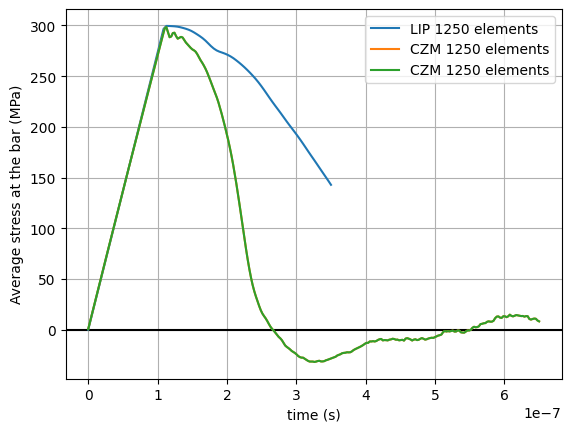

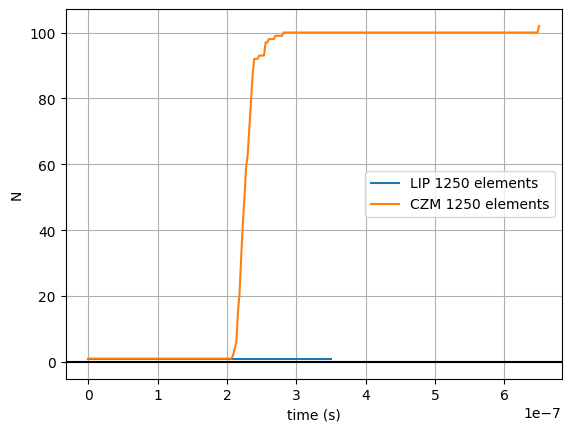

In [16]:
plotResults(
    stress_bar,
    label_x="time (s)",
    label_y="Average stress at the bar (MPa)",
)
plotResults(
    n_frag,
    label_x="time (s)",
    label_y="N",
)